**RESULTS POLARITY**

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

Import data

In [2]:
# Define function to read csv file into dataset
def read_csv_file(file): 
    dataset = pd.read_csv(file,header=0)
    return dataset

# Call funtion on file and keep only relevant columns
#df = read_csv_file(r"C:\Users\nayma\AppData\Local\Programs\Python\Python312\Scripts\thesis\df.csv")
path = r"C:\Users\jmarsal\AppData\Local\anaconda3\Scripts\thesis\df_to_train.csv"
df = read_csv_file(path)
df = df[['post_id','comment_train','polarity']]
df.head()

,post_id,comment_train,polarity
0,A1,🍸 first,neutral
1,A1,nice,positive
2,A1,LIKE BACK,positive
3,A1,❤ ️ ❤ ️ ❤ ️,strongly positive
4,A1,🫣,neutral


In [3]:
# Change hearts for Wordloud
hearts = {'❤':'❤️'}

for key, value in hearts.items():
    df.comment_train = df.comment_train.str.replace(key, value)

**Word clouds**
***
Created on WordItOut (https://worditout.com/word-cloud/create) with files 
<br> df_only_sp.csv (strongly positive) 
<br> df_only_pos.csv (spositive) 
<br> df_only_neu.csv (neutral) 
<br> df_only_neg.csv (negative) 
<br> df_only_sn.csv (strongly negative) 

**Value counts**

In [4]:
# Print all polarity per influencer
kj_dict = {'kylie' : r'A', 'kim' : r'B', r'khloe' : r'C', 'kendall' : r'D', 'kourtney' : r'E'}

for key, value in kj_dict.items():
    df.loc[df["post_id"].str.startswith(value) == True, "influencer"] = key

cross = df.groupby("influencer").polarity.value_counts(normalize=True).round(2)
print(cross.to_string())

influencer  polarity         
kendall     strongly positive    0.62
            neutral              0.18
            positive             0.13
            negative             0.04
            strongly negative    0.03
khloe       strongly positive    0.57
            neutral              0.18
            positive             0.14
            negative             0.06
            strongly negative    0.05
kim         strongly positive    0.54
            neutral              0.21
            positive             0.15
            negative             0.05
            strongly negative    0.05
kourtney    strongly positive    0.50
            neutral              0.19
            positive             0.18
            negative             0.08
            strongly negative    0.05
kylie       strongly positive    0.56
            neutral              0.22
            positive             0.14
            negative             0.04
            strongly negative    0.03


In [5]:
# Print all polarity per post
cross = df.groupby("post_id").polarity.value_counts(normalize=True).round(2)
print(cross.to_string())

post_id  polarity         
A1       strongly positive    0.60
         neutral              0.20
         positive             0.13
         negative             0.04
         strongly negative    0.03
A2       strongly positive    0.62
         neutral              0.20
         positive             0.12
         negative             0.03
         strongly negative    0.02
A3A      strongly positive    0.59
         neutral              0.22
         positive             0.14
         negative             0.04
         strongly negative    0.02
A3B      strongly positive    0.60
         neutral              0.22
         positive             0.13
         strongly negative    0.02
         negative             0.02
A4       strongly positive    0.45
         neutral              0.29
         positive             0.18
         negative             0.04
         strongly negative    0.04
A5       strongly positive    0.50
         neutral              0.28
         positive           

**Plots**

In [6]:
# Minor changes and definitions for presentation
custom_order = {'strongly positive' : 'Astrongly positive', 'positive' : 'Bpositive', 
                'neutral' : 'Cneutral', 'negative' : 'Dnegative', 'strongly negative' : 'Estrongly negative'}

for key, value in custom_order.items():
    df.loc[df["polarity"].str.startswith(key) == True, "polarity_plot"] = value

color_palette = ['gold', 'darkorange', 'darkkhaki', 'saddlebrown', 'crimson']

Influencer

<Axes: title={'center': 'KJ Clan'}, xlabel='influencer,polarity_plot'>

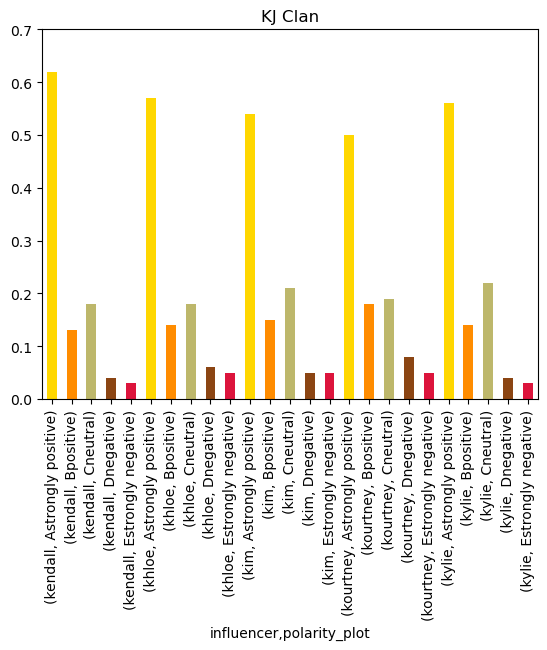

In [7]:
# Plot KJ clan
val_count = df.groupby("influencer").polarity_plot.value_counts(normalize=True, sort= False).round(2)
plt.ylim(0,0.7)
plt.title("KJ Clan")
val_count.plot(kind='bar', color=color_palette)

<Axes: title={'center': 'Kendall'}, xlabel='post_id,polarity_plot'>

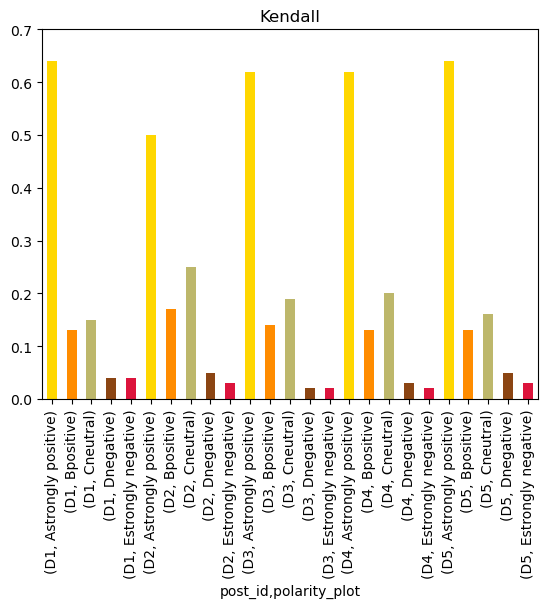

In [8]:
# Plot Kendall
df_sorted = df[df["influencer"] == 'kendall']

val_count = df_sorted.groupby("post_id").polarity_plot.value_counts(normalize=True, sort= False).round(2)
plt.ylim(0,0.7)
plt.title("Kendall")
val_count.plot(kind='bar', color=color_palette)

Maison Margiela

<Axes: title={'center': 'Maison Margiela'}, xlabel='post_id,polarity_plot'>

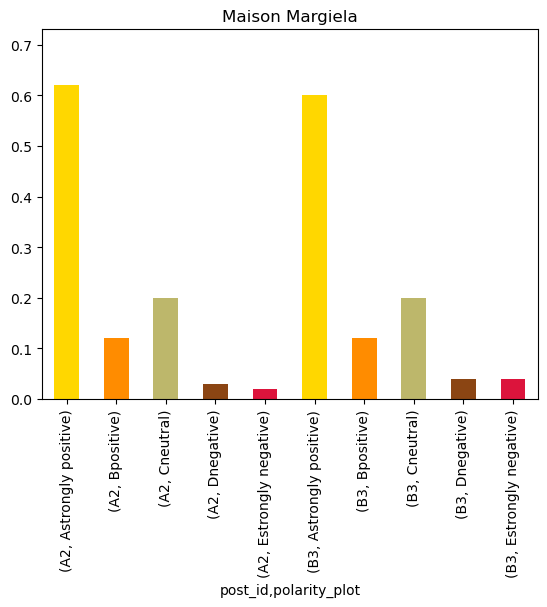

In [9]:
# Plot Maison Margiela
df_sorted = df[df["post_id"].isin(['A2','B3'])]

val_count = df_sorted.groupby("post_id").polarity_plot.value_counts(normalize=True, sort= False).round(2)
plt.ylim(0,0.73)
#plt.ylim(0,0.35)
plt.title("Maison Margiela")
val_count.plot(kind='bar', color=color_palette)

Alo

<Axes: title={'center': 'Alo'}, xlabel='post_id,polarity_plot'>

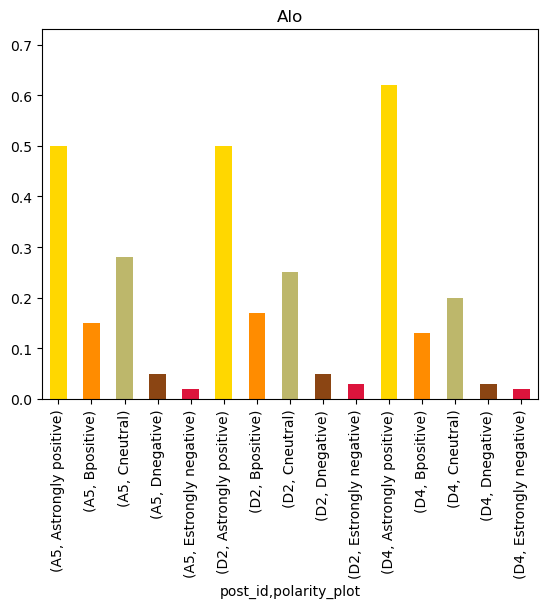

In [10]:
# Plot Alo
df_sorted = df[df["post_id"].isin(['A5','D2','D4'])]

val_count = df_sorted.groupby("post_id").polarity_plot.value_counts(normalize=True, sort= False).round(2)
plt.ylim(0,0.73)
#plt.ylim(0,0.35)
plt.title("Alo")
val_count.plot(kind='bar', color=color_palette)

Good American

<Axes: title={'center': 'Good American'}, xlabel='post_id,polarity_plot'>

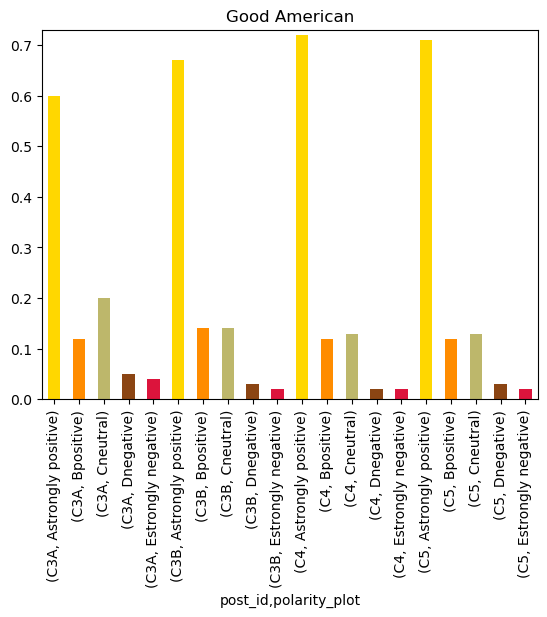

In [11]:
# Plot Good American
df_sorted = df[df["post_id"].isin(['C3A','C3B','C4','C5'])]

val_count = df_sorted.groupby("post_id").polarity_plot.value_counts(normalize=True, sort= False).round(2)
plt.ylim(0,0.73)
#plt.ylim(0,0.35)
plt.title("Good American")
val_count.plot(kind='bar', color=color_palette)

SKKN BY KIM

<Axes: title={'center': 'SKKN BY KIM'}, xlabel='post_id,polarity_plot'>

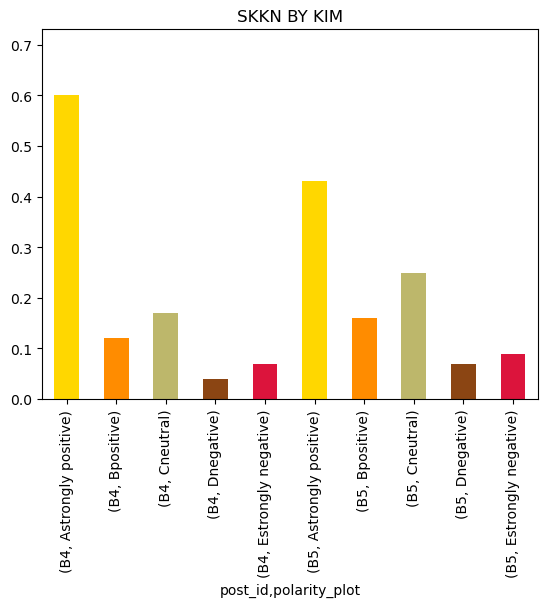

In [12]:
# Plot SKKN BY KIM
df_sorted = df[df["post_id"].isin(['B4','B5'])]

val_count = df_sorted.groupby("post_id").polarity_plot.value_counts(normalize=True, sort= False).round(2)
plt.ylim(0,0.73)
#plt.ylim(0,0.35)
plt.title("SKKN BY KIM")
val_count.plot(kind='bar', color=color_palette)

Kylie Cosmetics

<Axes: title={'center': 'Kylie Cosmetics'}, xlabel='post_id,polarity_plot'>

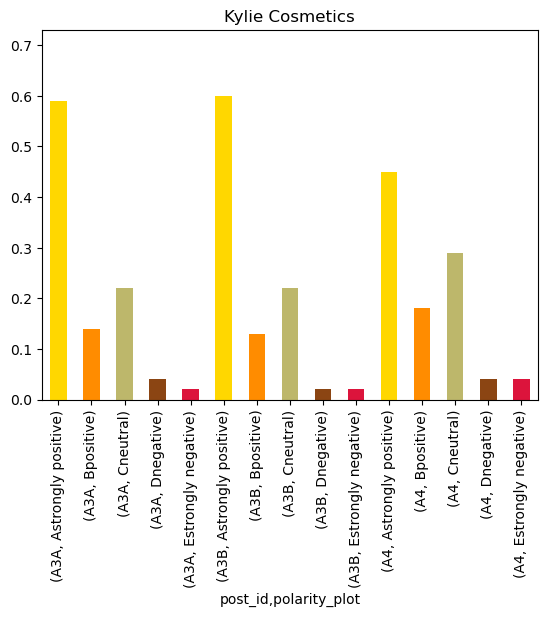

In [13]:
# Plot Kylie Cosmetics
df_sorted = df[df["post_id"].isin(['A3A','A3B','A4'])]

val_count = df_sorted.groupby("post_id").polarity_plot.value_counts(normalize=True, sort= False).round(2)
plt.ylim(0,0.73)
#plt.ylim(0,0.35)
plt.title("Kylie Cosmetics")
val_count.plot(kind='bar', color=color_palette)

**Polarity pie chart**

In [15]:
# Polarity data
df.polarity.value_counts()

polarity
strongly positive    14068
neutral               4945
positive              3718
negative              1322
strongly negative      965
Name: count, dtype: int64

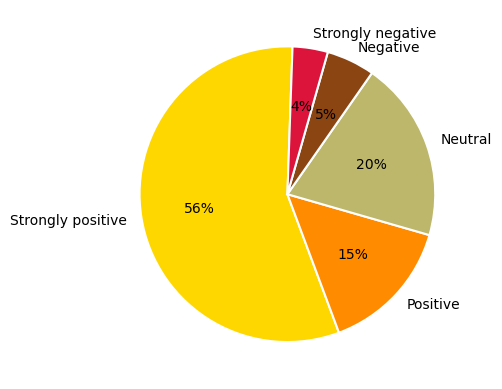

In [16]:
# Plot pie chart
y = np.array([14068, 3718, 4945, 1322, 965])
mylabels = ['Strongly positive', 'Positive', 'Neutral', 'Negative', 'Strongly negative']

plt.pie(y, labels = mylabels, startangle = 88, colors = color_palette, autopct='%1.f%%', wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},)
plt.show() 